In [90]:
import numpy as np
import pandas as pd
df = pd.read_csv("user.csv")

df

,ID,Area,City,Gender,BirthYear,PDGA,CountryCode,MetrixRating,MetrixRating2,PDGAMembershipStatus,CreatedOn,LastFinishedRoundOn,DeletedOn
0,1,Harjumaa,Kiili vald,M,1976.0,70804.0,EE,829.0,825.0,current,2012-05-01 00:00,2023-09-19 16:02:40,NaN
1,2,NaN,NaN,M,1983.0,57284.0,FI,0.0,0.0,NaN,2018-03-01 21:51,2020-07-09 17:17:37,NaN
2,3,NaN,NaN,M,2005.0,NaN,FI,0.0,0.0,NaN,2019-10-27 22:25,2020-07-09 17:17:37,NaN
3,9,Pärnumaa,Paikuse,M,1975.0,51683.0,EE,981.0,982.0,current,2012-06-02 00:00,2023-11-05 14:10:59,NaN
4,10,Uusimaa,Vantaa,M,1967.0,47270.0,EE,874.0,860.0,current,2012-06-27 00:00,2023-11-15 19:17:13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185676,194623,NaN,Panev?žys,M,1945.0,NaN,LT,NaN,NaN,NaN,2023-11-22 13:04,2023-11-22 14:02:29,NaN
185677,194624,?????,?????,F,1993.0,NaN,IR,NaN,NaN,NaN,2023-11-22 14:08,NaN,NaN
185678,194625,Bourgogne-Franche-Comté,Auxerre,M,1996.0,270933.0,FR,NaN,NaN,NaN,2023-11-22 16:16,NaN,NaN
185679,194626,NaN,Jyväskylä,F,1975.0,NaN,FI,NaN,NaN,NaN,2023-11-22 16:19,NaN,NaN


In [91]:
data_E = df[df["CountryCode"]=="EE"]

data_E

,ID,Area,City,Gender,BirthYear,PDGA,CountryCode,MetrixRating,MetrixRating2,PDGAMembershipStatus,CreatedOn,LastFinishedRoundOn,DeletedOn
0,1,Harjumaa,Kiili vald,M,1976.0,70804.0,EE,829.0,825.0,current,2012-05-01 00:00,2023-09-19 16:02:40,NaN
3,9,Pärnumaa,Paikuse,M,1975.0,51683.0,EE,981.0,982.0,current,2012-06-02 00:00,2023-11-05 14:10:59,NaN
4,10,Uusimaa,Vantaa,M,1967.0,47270.0,EE,874.0,860.0,current,2012-06-27 00:00,2023-11-15 19:17:13,NaN
5,11,Harjumaa,"Harjumaa, Keila linn,",M,1984.0,49264.0,EE,888.0,883.0,current,2012-06-07 16:06,2023-08-16 20:02:01,NaN
6,12,NaN,Pärnu,M,1988.0,51689.0,EE,968.0,975.0,expired,2012-06-07 19:32,2023-09-17 12:40:09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185605,194551,Estonian,Tapa,M,2011.0,NaN,EE,NaN,NaN,NaN,2023-11-18 13:25,2023-11-18 15:45:29,NaN
185613,194559,Harju maakond,Kütke,M,1980.0,NaN,EE,NaN,NaN,NaN,2023-11-18 18:50,2023-11-19 16:01:36,NaN
185661,194608,Tartumaa (Tartu),Tartu linn,M,1978.0,NaN,EE,NaN,NaN,NaN,2023-11-21 17:24,NaN,NaN
185666,194613,Vilandi maakond,Viljandi vald,M,1984.0,NaN,EE,NaN,NaN,NaN,2023-11-21 20:06,NaN,NaN


C:\Users\karmo\AppData\Local\Temp\ipykernel_22672\396879149.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_E['CreatedOn'] = pd.to_datetime(data_E['CreatedOn'])
C:\Users\karmo\AppData\Local\Temp\ipykernel_22672\396879149.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_E['YearMonth'] = data_E['CreatedOn'].dt.to_period('M').astype(str)
C:\Users\karmo\AppData\Local\Temp\ipykernel_22672\396879149.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



0         2012-05
3         2012-06
4         2012-06
5         2012-06
6         2012-06
           ...   
185605    2023-11
185613    2023-11
185661    2023-11
185666    2023-11
185667    2023-11
Name: YearMonth, Length: 29466, dtype: object


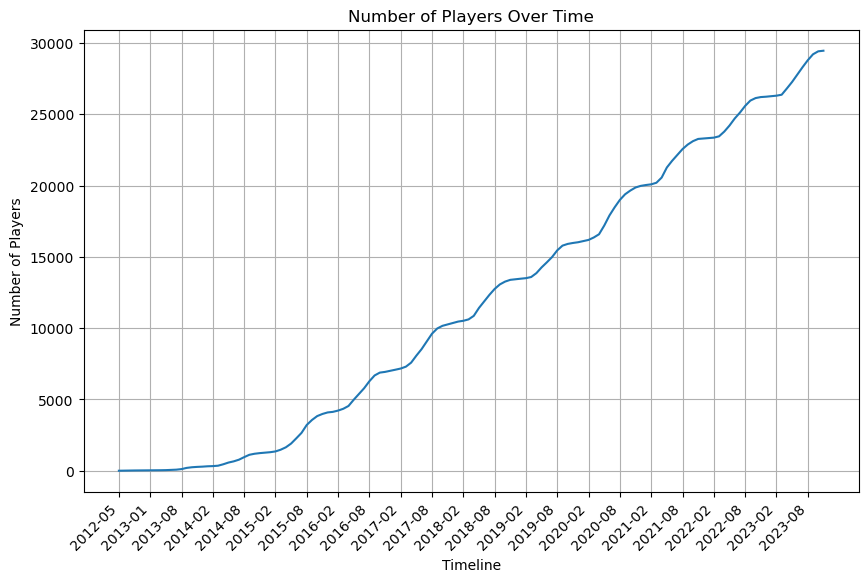

In [92]:

import matplotlib.pyplot as plt

data_E['CreatedOn'] = pd.to_datetime(data_E['CreatedOn'])

data_E['YearMonth'] = data_E['CreatedOn'].dt.to_period('M').astype(str)

account_counts = data_E.groupby('YearMonth').size().reset_index(name='NumAccounts')
for i in range(1,len(account_counts)):
    account_counts["NumAccounts"][i] += account_counts["NumAccounts"][i-1]
print(data_E['YearMonth'])
plt.figure(figsize=(10, 6))
plt.plot(account_counts['YearMonth'], account_counts['NumAccounts'])
n = 6
plt.xticks(range(0, len(account_counts['YearMonth']), n), account_counts['YearMonth'][::n], rotation=45, ha='right')
plt.title('Number of Players Over Time')
plt.xlabel('Timeline')
plt.ylabel('Number of Players')
plt.grid(True)
plt.show()

C:\Users\karmo\AppData\Local\Temp\ipykernel_22672\4235531434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_E_MW['CreatedOn'] = pd.to_datetime(data_E_MW['CreatedOn'])
C:\Users\karmo\AppData\Local\Temp\ipykernel_22672\4235531434.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_E_MW['YearMonth'] = data_E_MW['CreatedOn'].dt.to_period('M').astype(str)
C:\Users\karmo\AppData\Local\Temp\ipykernel_22672\4235531434.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Gender YearMonth     F      M
0        2012-05   0.0    1.0
1        2012-06   0.0    7.0
2        2012-07   0.0    5.0
3        2012-09   1.0    5.0
4        2012-11   0.0    2.0
..           ...   ...    ...
131      2023-07  88.0  425.0
132      2023-08  75.0  412.0
133      2023-09  60.0  358.0
134      2023-10  21.0  188.0
135      2023-11   3.0   39.0

[136 rows x 3 columns]


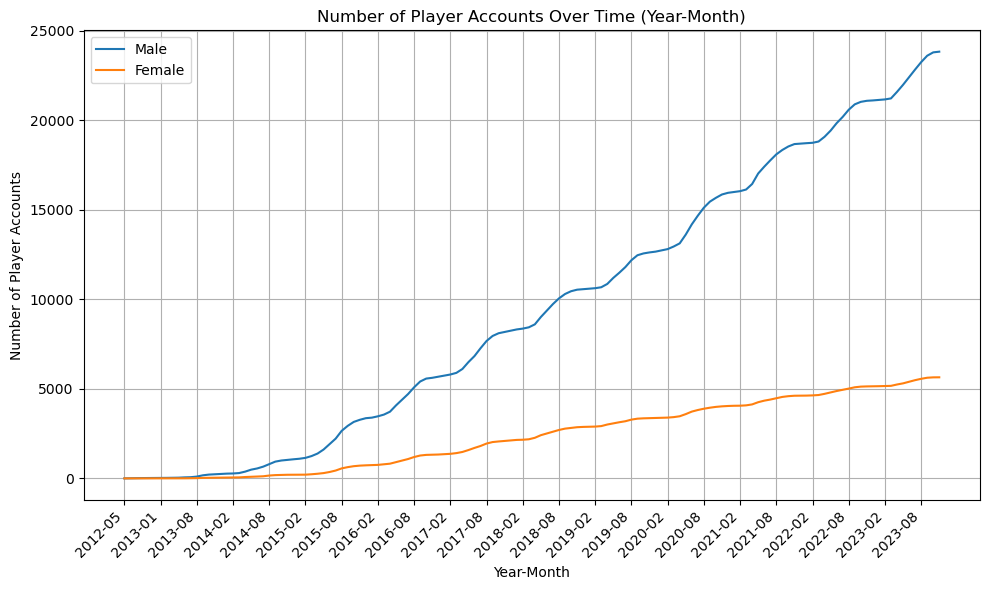

In [93]:
data_E_MW = df[df["CountryCode"]=="EE"]

data_E_MW['CreatedOn'] = pd.to_datetime(data_E_MW['CreatedOn'])
data_E_MW['YearMonth'] = data_E_MW['CreatedOn'].dt.to_period('M').astype(str)
account_counts = data_E.groupby(['YearMonth', 'Gender']).size().unstack().reset_index()
account_counts.fillna(0, inplace=True)
print(account_counts)
for i in range(1,len(account_counts)):
    account_counts["M"][i] += account_counts["M"][i-1]
    account_counts["F"][i] += account_counts["F"][i-1]

plt.figure(figsize=(10, 6))
plt.plot(account_counts['YearMonth'], account_counts['M'],  label='Male')
plt.plot(account_counts['YearMonth'], account_counts['F'],  label='Female')

plt.title('Number of Player Accounts Over Time (Year-Month)')
plt.xlabel('Year-Month')
plt.ylabel('Number of Player Accounts')

# Display every n-th label for better spacing
n = 6
plt.xticks(range(0, len(account_counts['YearMonth']), n), account_counts['YearMonth'][::n], rotation=45, ha='right')

plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


In [94]:
voistlused = pd.read_csv("voistluste_arv.csv")
voistlused

,UserID,VoistlusteArv
0,1,487
1,9,1575
2,10,886
3,11,369
4,12,525
...,...,...
18233,194653,1
18234,194662,1
18235,194664,1
18236,194674,1


In [95]:
voistlused = voistlused.rename(columns = {'UserID' : 'ID'})
voistlused = pd.merge(voistlused, data_E[["ID", "MetrixRating"]], how='inner', on=["ID"])
voistlused = voistlused.dropna()
voistlused = voistlused[voistlused["VoistlusteArv"] < 1000]
voistlused = voistlused[voistlused["MetrixRating"] > 1]
voistlused

,ID,VoistlusteArv,MetrixRating
0,1,487,829.0
2,10,886,874.0
3,11,369,888.0
4,12,525,968.0
5,13,862,935.0
...,...,...,...
18158,192927,18,833.0
18177,193302,7,550.0
18182,193407,3,766.0
18184,193427,14,893.0


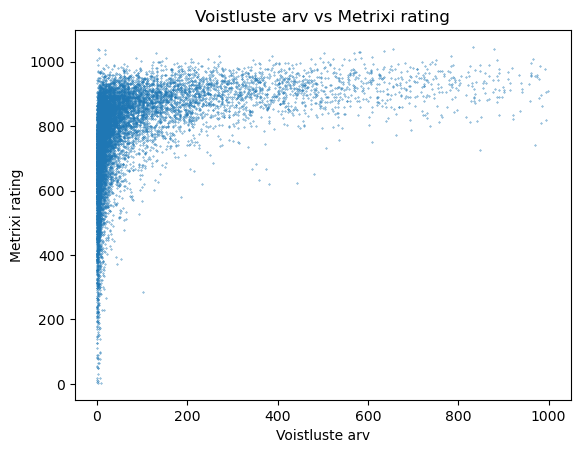

In [96]:
x_values = voistlused["VoistlusteArv"]
y_values = voistlused["MetrixRating"]


plt.scatter(x_values, y_values, s=0.1)


plt.xlabel('Voistluste arv')
plt.ylabel('Metrixi rating')
plt.title('Voistluste arv vs Metrixi rating')


plt.show()

In [97]:
correlation = voistlused["VoistlusteArv"].corr(voistlused["MetrixRating"])
print("Correlation between VoistlusteArv and MetrixRating:", correlation)

Correlation between VoistlusteArv and MetrixRating: 0.4189313647454399


In [98]:
from scipy.stats import spearmanr

# Calculate Spearman correlation
correlation, p_value = spearmanr(voistlused["VoistlusteArv"], voistlused["MetrixRating"])

print("Spearman correlation between VoistlusteArv and MetrixRating:", correlation)
print("p-value:", p_value)

Spearman correlation between VoistlusteArv and MetrixRating: 0.660812583781713
p-value: 0.0


In [99]:
treening = pd.read_csv("treeningute_arv.csv")
treening

,UserID,TreeninguteArv
0,1,256
1,9,242
2,10,585
3,11,90
4,12,241
...,...,...
23818,194418,9
23819,194498,1
23820,194551,1
23821,194655,1


In [100]:
treening = treening.rename(columns={"UserID":"ID"})
treening = pd.merge(treening, data_E[["ID", "MetrixRating"]], how='inner', on=["ID"])
treening = treening[treening["MetrixRating"]>1]
treening = treening[treening["TreeninguteArv"]<1000]

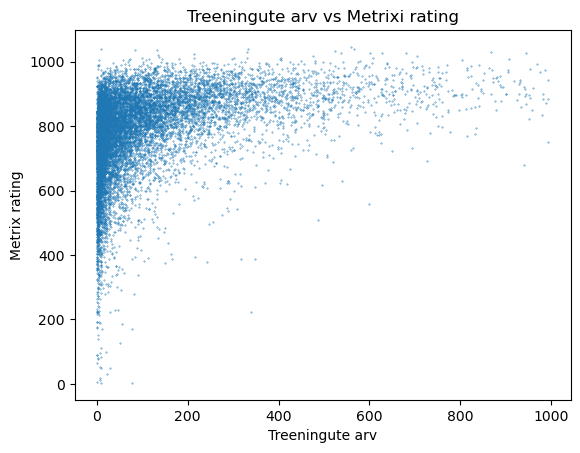

In [101]:
x_values = treening["TreeninguteArv"]
y_values = treening["MetrixRating"]


plt.scatter(x_values, y_values, s=0.1)


plt.xlabel('Treeningute arv')
plt.ylabel('Metrix rating')
plt.title('Treeningute arv vs Metrixi rating')


plt.show()

In [102]:
correlation = treening["TreeninguteArv"].corr(treening["MetrixRating"])
print("Correlation between TreeninguteArv and MetrixRating:", correlation)

Correlation between TreeninguteArv and MetrixRating: 0.38992660197703866


In [103]:
correlation, p_value = spearmanr(treening["TreeninguteArv"], treening["MetrixRating"])

print("Spearman correlation between VoistlusteArv and MetrixRating:", correlation)
print("p-value:", p_value)

Spearman correlation between VoistlusteArv and MetrixRating: 0.5200088894639976
p-value: 0.0
